Os dados deste exercícios são dados reais que estão presentes na biblioteca do sklearn

OBJETIVO: temos um conjuntos de características de vinhos e queremos agrupar vinhos similares entre si pra informar ao stackholder pra que ele tenha uma ação com esses vinhos semelhantes: ação de campanhas pra eles, algo nesse sentido. Então o objetivo é clusterizar produtos.

Vamos instalar a biblioteca Kmodes, ela é similar ao K means, porém ela é específica para dados categóricos.

In [118]:
%%capture
%pip install kmodes

Adicionar bibliotecas de Data Wrangling

In [119]:
# Data wrangling
import numpy as np
import pandas as pd

Bibliotecas de visualização de dados

In [120]:
# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

Dentro de machine learning, vou começar com KMeans

In [121]:
## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


De scipy

In [122]:
from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

Para fins didáticos utilizarei as bibliotecas abaixo

In [123]:
# Didatic purposes
import string
from ipywidgets import interact

A célula abaixo vai estar configurando nossas figuras, é só pra deixar os gráficos estaticamente mais atraentes

In [124]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

Vou usar o sub-módulo datasets do sklearn pra carregar os dados do vinho 

Carregando os dados

In [125]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Data Cleaning

In [126]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Há dados duplicados, qualquer um ?

In [127]:
df_wines.duplicated().any()

False

Há dados faltantes ?

In [128]:
df_wines.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Há outliers ?

<Axes: >

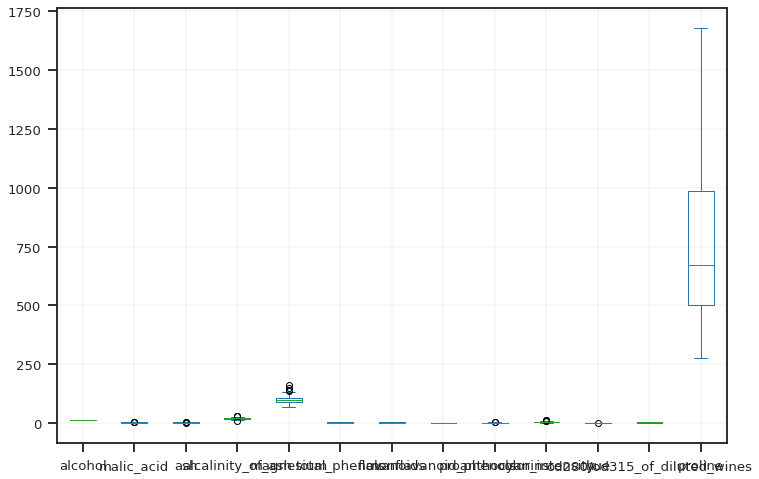

In [129]:
df_wines.plot.box()

Observe que têm algumas variáveis que são outliers porém fica um pouco difícil de visualizar porque não temos os dados na mesma escala. Inclusive pra rodar o KMeans e outros modelos é necessario que os dados estejam na mesma escala. 

<Axes: >

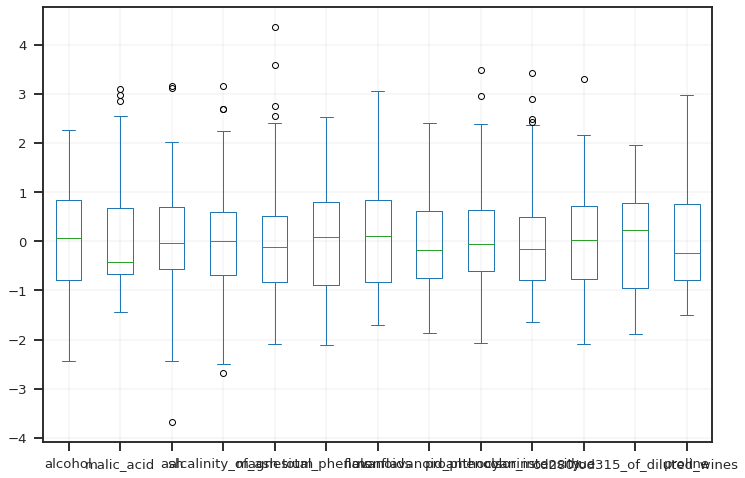

In [130]:
df_wines_scaled = df_wines.apply(scale)


df_wines_scaled.apply(scale).plot.box()

Agora com os dados padronizados com média em 0 e desvio padrão em 1 vemos que algumas características não têm outilers e outras têm outliers mais consideráveis, nada muito distante.

Pra colocar os nomes das colunas num melhor formato:

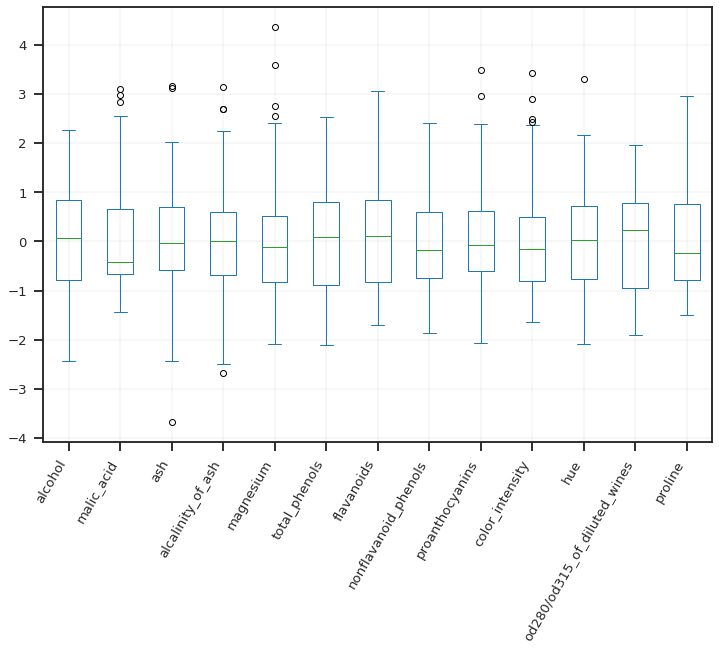

In [131]:
df_wines_scaled.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

Identificando e removendo linhas com outilers (IZ-score > 3), ou seja, que o valor absoluto das características do vinho é maior do que 3:

.abs() --> pega os valores absolutos

.gt(3) -->

In [132]:
df_wines_scaled.abs().gt(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


Agora quero saber se na linha existe algum valor que é maior do que 0

Aonde tem True significa que é uma linha que possui valor maior do que 3 desvio padrão

In [133]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)

Vou fazer uma soma e toda vez que tiver 1 vai retorna True

In [134]:
outlier_rows.sum()

10

Existem 10 outlier, só observar no gráfico plotado anteriormente > 3 têm 10 outlier.

Selecionando apenas as 10 linhas outliers:

In [135]:
df_wines_scaled[outlier_rows]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,0.061000,-0.257044,3.119772,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.757038,0.830961,0.264653
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540
69,-0.976623,-1.029035,-2.253579,-0.809251,3.599025,-0.713218,-0.752242,-1.787656,1.592822,-0.955153,1.415139,0.647343,-0.092010
73,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249
95,-0.655454,-0.732806,-0.608676,-0.148624,4.371372,0.328298,0.241685,-0.337251,2.959447,-1.063296,0.888658,0.025868,0.605394
110,-1.903071,1.260006,-1.997705,0.001518,0.509638,1.417883,0.552915,-0.981875,3.485073,-0.933525,-0.910151,0.280108,-0.588791
115,-2.434235,-0.741782,-0.608676,0.602088,-1.035055,0.264205,0.141289,1.274310,0.734300,-1.366095,3.301694,0.364855,-1.082388
121,-1.779545,-0.257044,3.156325,2.704083,1.352198,1.417883,3.062832,0.871420,0.489009,0.407442,-0.120430,1.523058,-0.897687
123,0.061000,3.109192,-0.864550,0.602088,-0.964842,0.520578,0.623193,-0.498407,0.734300,-1.063296,-0.997898,0.689716,-1.168369
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711


Vou tirar elas do dataset e sobrescrever ele:

In [136]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

Verificando o melhor K

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

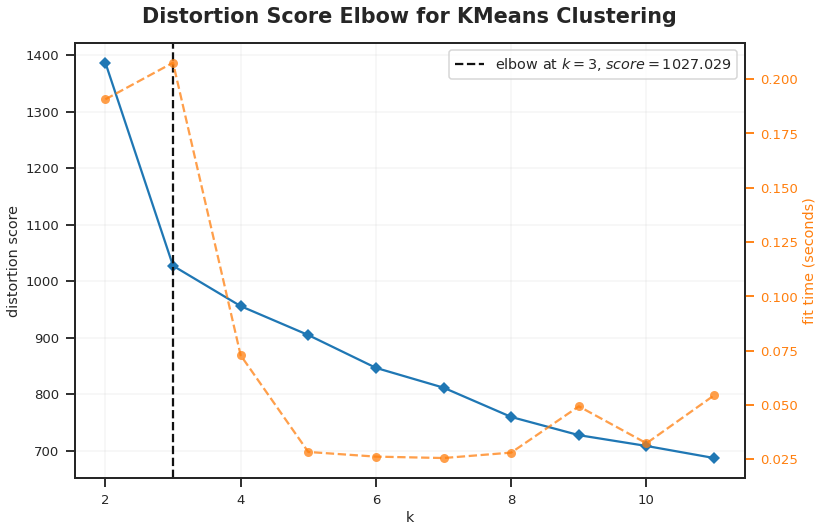

In [137]:
kelbow_visualizer(KMeans(), df_wines_scaled, k=11);

Temos o gráfico do cotovelo (elbow), o eixo y secundário é o tempo que demorou pra executar o algoritmo. Então ele está sugerindo que k = 3, porém posso considerar outro, por exemplo k = 4, pq do 3 pro 4 tivemos um decrescimo significativo. Os outros apesarem de estar caindo não é nada muito evidente.

A intepretação é a seguinte: quando começamos a aumentar muito a quantidade k de clusteris chegamos numa resolução melhor de distorção. Porém do 5 em diante não tem um ponto que se eu aumentar um grupo vou reduzir muito a quantidade de variância

Vou considerar 4 pra diminuir ainda mais a variância dos dados.

Clusterizando

Criando e treinando o modelo

In [138]:
model = KMeans(4, random_state=0).fit(df_wines_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Salvando centroides e labels

In [139]:
centroids = model.cluster_centers_
labels = model.labels_

Interpretando Clusters

Existem duas formas principais de fazer isso:

1- Tabela: agrupa os dados de interesse por cluster criados e pega alguma métrica de medida de resumo dessa variável, exemplo: média da quantidade de álcool de cada um dos grupos, valor máximo quantidade de álcool de cada um dos grupos e assim por diante;

2- Centródide: aonde está alocado os clusters.

Convertendo centroides em dataframes, lembrando que centroides é um array

In [140]:
centroids

array([[ 0.14696424,  0.93703085,  0.19549913,  0.5285491 , -0.07642805,
        -1.02681675, -1.23742409,  0.70039722, -0.81647281,  0.90374988,
        -1.1796589 , -1.2969276 , -0.39876163],
       [ 0.96053748, -0.31635422,  0.30972854, -0.7749329 ,  0.45572459,
         0.89769789,  0.97476023, -0.60776293,  0.5637851 ,  0.2415978 ,
         0.46324276,  0.78606524,  1.22096774],
       [-0.97415216, -0.39528445,  0.19111272,  0.64893274, -0.49019957,
        -0.62861447, -0.36712017,  0.79728822, -0.49566263, -0.9162221 ,
         0.40183882, -0.15435937, -0.70967481],
       [-0.78613183, -0.45334909, -0.79048098, -0.14388286, -0.54910486,
         0.265048  ,  0.31645435, -0.50264794,  0.25570482, -0.80648593,
         0.45338774,  0.52133841, -0.7340211 ]])

In [141]:
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.146964,0.937031,0.195499,0.528549,-0.076428,-1.026817,-1.237424,0.700397,-0.816473,0.903750,-1.179659,-1.296928,-0.398762
1,0.960537,-0.316354,0.309729,-0.774933,0.455725,0.897698,0.974760,-0.607763,0.563785,0.241598,0.463243,0.786065,1.220968
2,-0.974152,-0.395284,0.191113,0.648933,-0.490200,-0.628614,-0.367120,0.797288,-0.495663,-0.916222,0.401839,-0.154359,-0.709675
3,-0.786132,-0.453349,-0.790481,-0.143883,-0.549105,0.265048,0.316454,-0.502648,0.255705,-0.806486,0.453388,0.521338,-0.734021


Vou ter a quantidade de clusters e variáveis mas eu quero recuperar o nome das variáveis, então:

In [142]:
pd.DataFrame(centroids, columns=df_wines_scaled.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.146964,0.937031,0.195499,0.528549,-0.076428,-1.026817,-1.237424,0.700397,-0.816473,0.903750,-1.179659,-1.296928,-0.398762
1,0.960537,-0.316354,0.309729,-0.774933,0.455725,0.897698,0.974760,-0.607763,0.563785,0.241598,0.463243,0.786065,1.220968
2,-0.974152,-0.395284,0.191113,0.648933,-0.490200,-0.628614,-0.367120,0.797288,-0.495663,-0.916222,0.401839,-0.154359,-0.709675
3,-0.786132,-0.453349,-0.790481,-0.143883,-0.549105,0.265048,0.316454,-0.502648,0.255705,-0.806486,0.453388,0.521338,-0.734021


Caso queria plotar as barras por clusters, vou fazer uma inversão

In [143]:
pd.DataFrame(centroids, columns=df_wines_scaled.columns).T

,0,1,2,3
alcohol,0.146964,0.960537,-0.974152,-0.786132
malic_acid,0.937031,-0.316354,-0.395284,-0.453349
ash,0.195499,0.309729,0.191113,-0.790481
alcalinity_of_ash,0.528549,-0.774933,0.648933,-0.143883
magnesium,-0.076428,0.455725,-0.490200,-0.549105
total_phenols,-1.026817,0.897698,-0.628614,0.265048
flavanoids,-1.237424,0.974760,-0.367120,0.316454
nonflavanoid_phenols,0.700397,-0.607763,0.797288,-0.502648
proanthocyanins,-0.816473,0.563785,-0.495663,0.255705
color_intensity,0.903750,0.241598,-0.916222,-0.806486


Adicionando um nome pros clusters

In [144]:
pd.DataFrame(centroids, columns=df_wines_scaled.columns).T.add_prefix('Cluster_')

,Cluster_0,Cluster_1,Cluster_2,Cluster_3
alcohol,0.146964,0.960537,-0.974152,-0.786132
malic_acid,0.937031,-0.316354,-0.395284,-0.453349
ash,0.195499,0.309729,0.191113,-0.790481
alcalinity_of_ash,0.528549,-0.774933,0.648933,-0.143883
magnesium,-0.076428,0.455725,-0.490200,-0.549105
total_phenols,-1.026817,0.897698,-0.628614,0.265048
flavanoids,-1.237424,0.974760,-0.367120,0.316454
nonflavanoid_phenols,0.700397,-0.607763,0.797288,-0.502648
proanthocyanins,-0.816473,0.563785,-0.495663,0.255705
color_intensity,0.903750,0.241598,-0.916222,-0.806486


Plotando um gráfico de barra pra cada uma das variáveis eu consigo ter mais noção de interpretação dos dados

<Axes: >

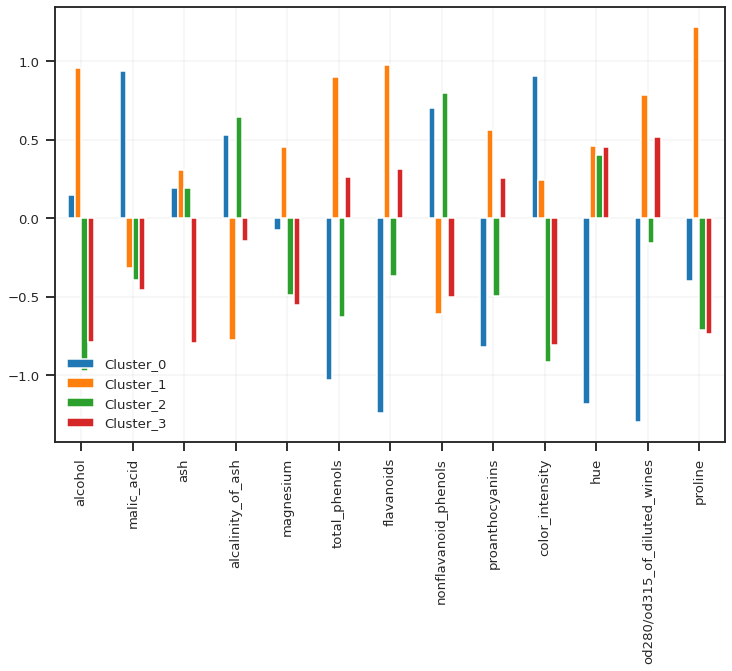

In [145]:
pd.DataFrame(centroids, columns=df_wines_scaled.columns).T.add_prefix('Cluster_').plot.bar()

Pra interpretar o gráfico é melhor de forma separada, observe que acima ficou tudo junto, desorganizado. Vou aumentar o tamanho da figura também e tirar a legenda

array([<Axes: title={'center': 'Grupo_0'}>,
       <Axes: title={'center': 'Grupo_1'}>,
       <Axes: title={'center': 'Grupo_2'}>,
       <Axes: title={'center': 'Grupo_3'}>], dtype=object)

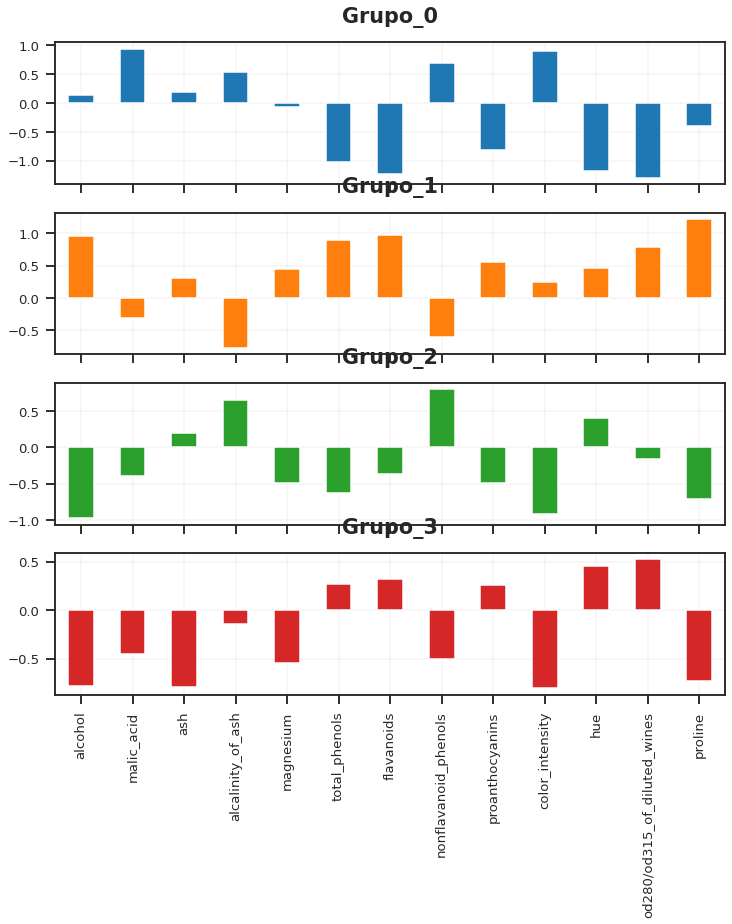

In [146]:
(
pd.DataFrame(centroids, columns=df_wines_scaled.columns)
.T.add_prefix('Grupo_')
.plot.bar(subplots=True, figsize=(12,12), legend=False)
)

Os clusters estão muito próximos um dos outros, então:

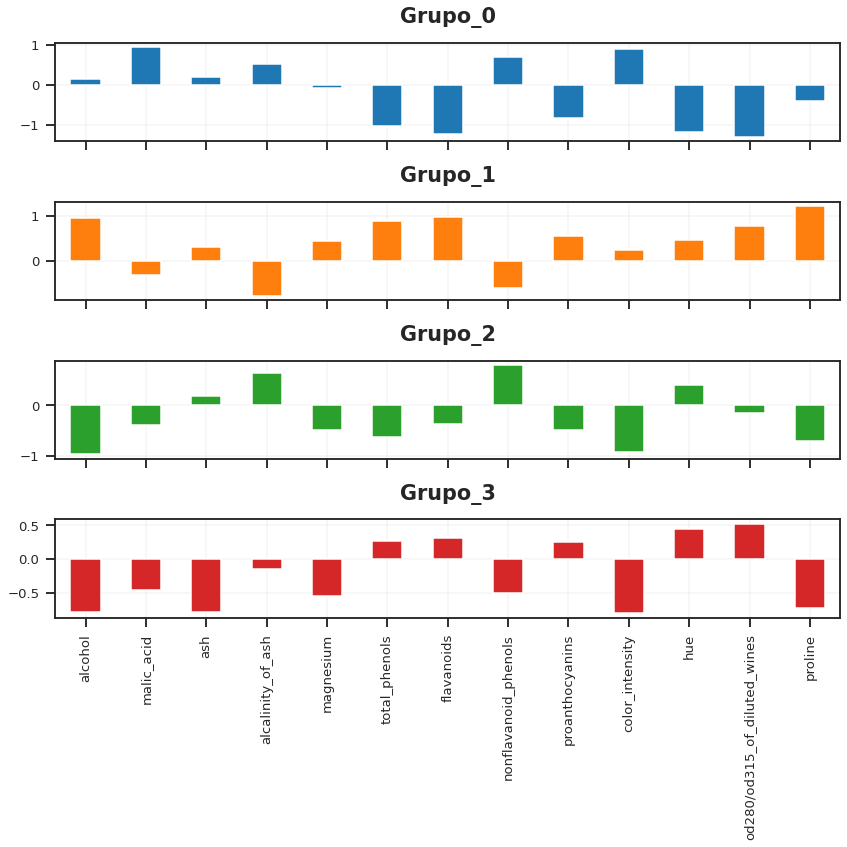

In [147]:
(
pd.DataFrame(centroids, columns=df_wines_scaled.columns)
.T.add_prefix('Grupo_')
.plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.tight_layout()

plt.xticks(rotation=60, ha='right') --> melhor posição do nome das colunas;

ha='right' --> alinhamento horizontal a direita

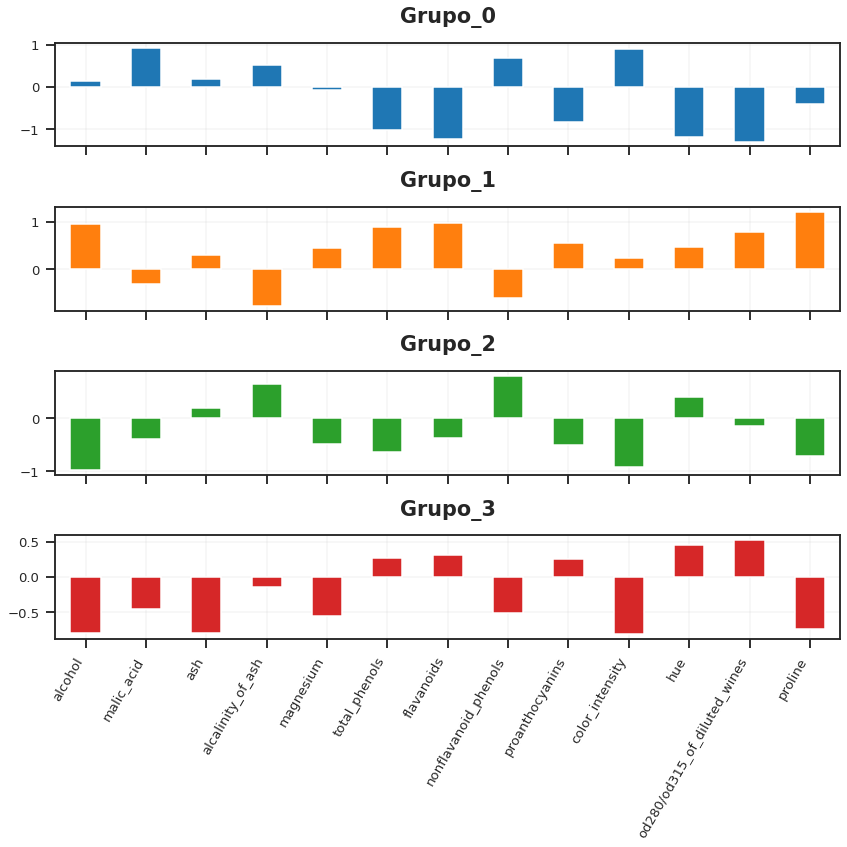

In [148]:
(
pd.DataFrame(centroids, columns=df_wines_scaled.columns)
.T.add_prefix('Grupo_')
.plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Cada grupo é um cluster, cada barra no eixo X é uma variável. 

Vamos interpretar de forma relativa 1 a 1, exemplo: aonde que tenho alcool positivo ? Grupo 2 e 3 baixo teor alcoolico, grupo 0 tem pouco, grupo 1 tem muito. Faz isso pras demais variáveis. Observe que aonde tem bastante alcool, grupo 1, tem também bastante de uma substância chamada total_phenols, flavanoids, proline...

COPIANDO ALGUMAS ADPATAÇÕES DO LIVRO ESTATISTICA PRÁTICA PARA CIENCIAS DE DADOS

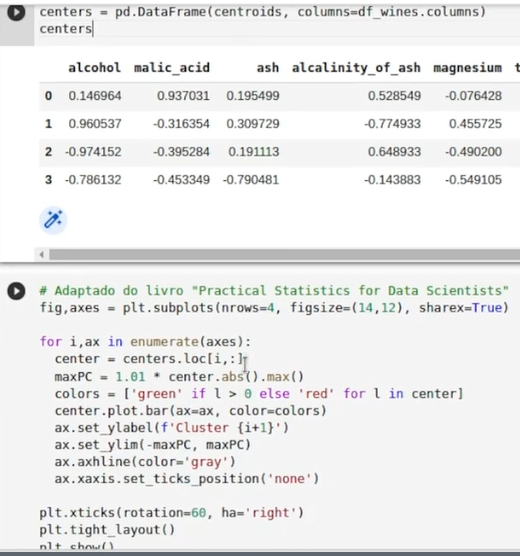

fig, axes --> Vou configurar um plot com linhas, especificar o tamanho da figura e se eu quero ter o eixo X compartilhado entre eles ou não; 

for --> na primeira interação que é o primeiro centróide quero saber qual valor máximo do termo absoluto e multiplica por 1.01 pra pegar a totalidade mais um pouco pra o gráfico de barras não chegar no limite direto;

colors --> plotar algumas cores se o valor do centróide for acima de 0 vai ser verde e se não vermelho;

center.plot.bar --> vou plotar o centróide dentro desse sub-plot;

ax.set_ylabel --> definir qual vai ser o nome do eixo y;

ax.set_ylim --> o limite do eixo y, quero que o limite superior e inferior seja o mesmo;

ax.axhline --> plotando uma linha horizontal no zero pra ficar mais fácil saber o que é positivo;

ax.axis.set_tickets --> o que é negativo e os tickets como se fosse nenhum pra não ficar poluido

Vai gerar um gráfico parecido com o que eu fiz:

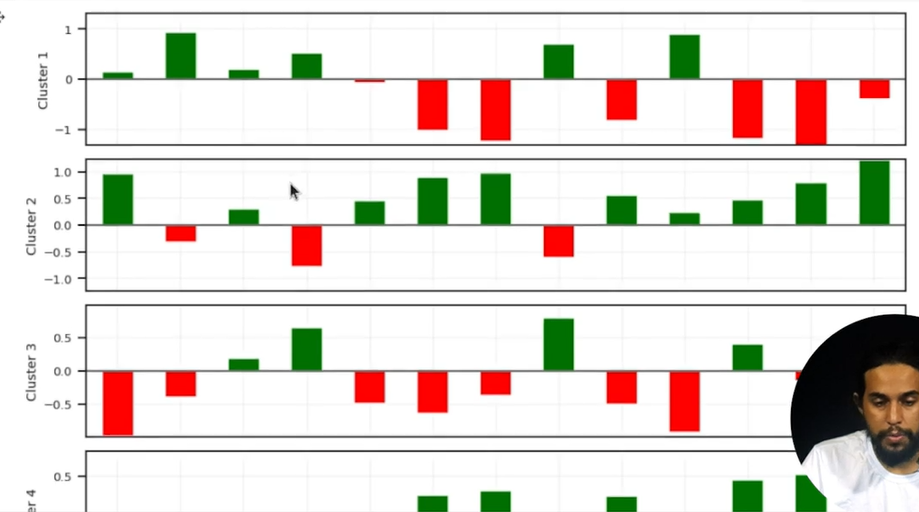

Outra forma de interpretar os clusters é utilizando groupby na tabela

Excluo os outliers e coloco uma coluna com os clusters, dar o groupby, pegar uma função de agregação ou várias

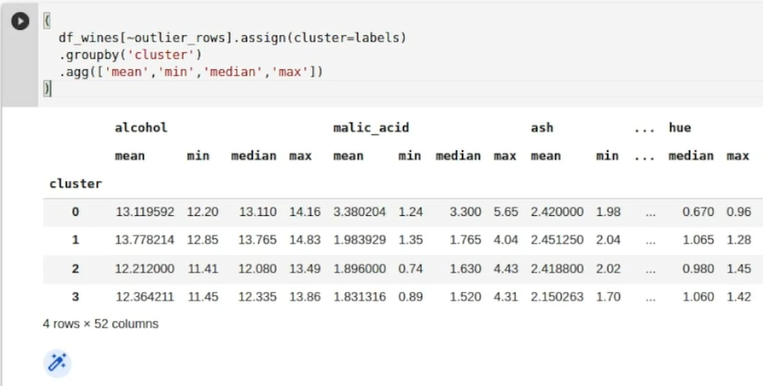

Isso vai gerar uma tabela grande, dificil de interpretar, mas com todas as informações que precisamos. Então depois podemos filtrar alguma informação específica e comparar. Exemplo: a média de alcool, valor minimo, mediana, valor máximo....o que mostra na imagem acima.

O que se pode fazer é pegar uma métrica alvo e plotar de forma separada:

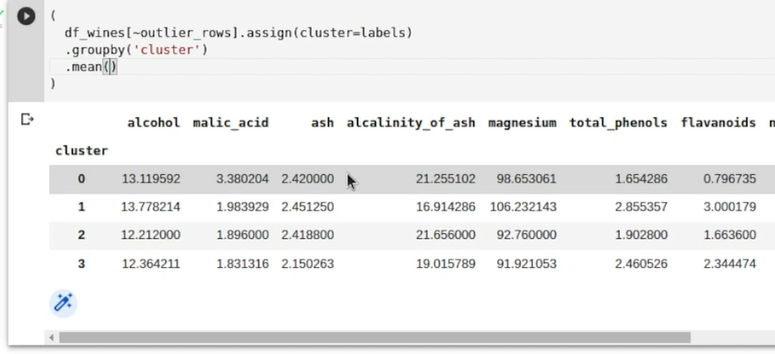

Posso inverter:

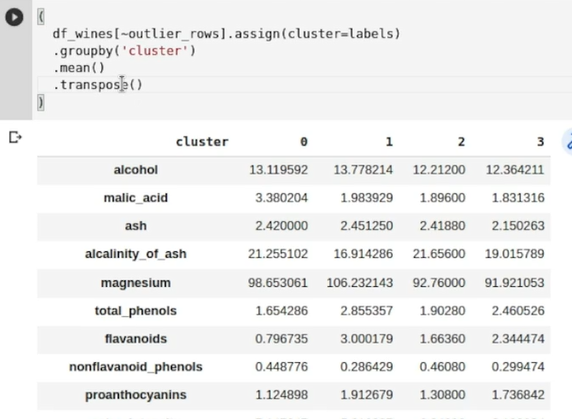

Podemos utilizar a funcionalidade do pandas de estilização pra facilitar aonde está maior ou menor com os dados originais, sem normalização: Por padrão posso ver pela coluna qual valor mais alto

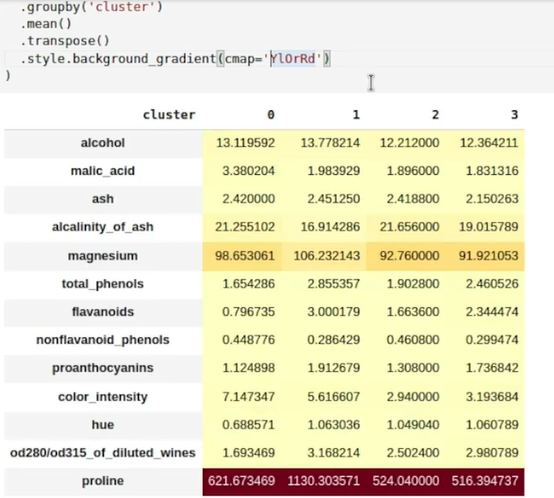

Posso ver por linha pra cada uma das variáveis qual cluster que está mais forte ou mais fraco:

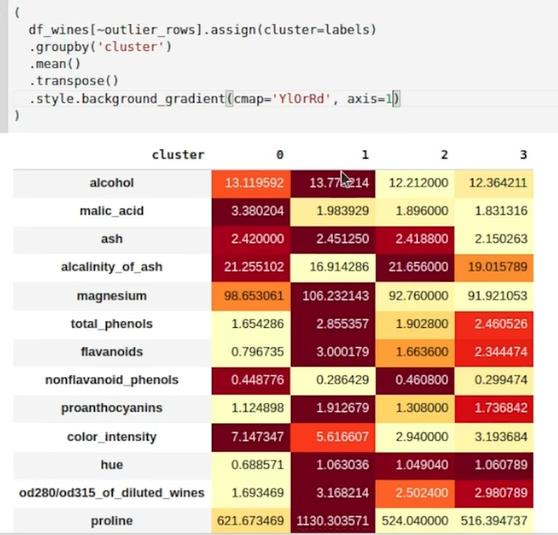

Pode usar o scaled como os dados normarlizados:

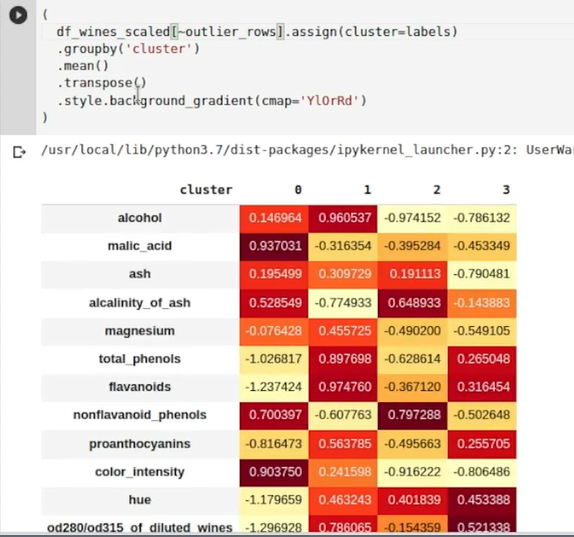

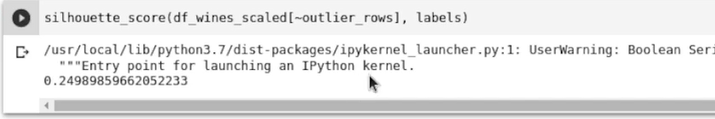

0.2 então está positiva não está tão forte, talvez se aumentar a quantidade de clusters pode ter uma explicabilidade melhor.